/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


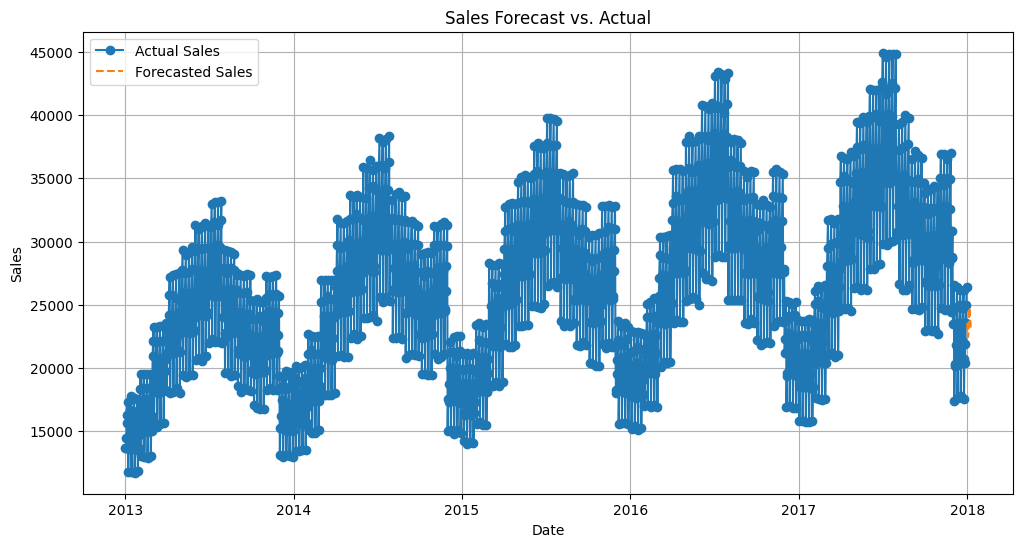

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the cleaned sales data
file_path = "/Users/sanjojoy/Desktop/Git_repositories/Sales forecasting/data/cleaned_sales_data.csv"
sales = pd.read_csv(file_path)

# Ensure 'date' is a datetime and set it as the index
sales['date'] = pd.to_datetime(sales['date'])
sales.set_index('date', inplace=True)

# Define 'actual' sales
actual = sales['sales']

# Define and fit the ARIMA model
model = ARIMA(actual, order=(5, 1, 0))  # Adjust (p, d, q) as needed
model_fit = model.fit()

# Forecast the next 10 steps
forecast = model_fit.forecast(steps=10)
forecast_index = pd.date_range(start=actual.index[-1], periods=10, freq='D')
forecast = pd.Series(forecast, index=forecast_index)

# Plot Actual vs Forecasted Sales
plt.figure(figsize=(12, 6))
plt.plot(actual.index, actual, label="Actual Sales", marker='o')
plt.plot(forecast.index, forecast, label="Forecasted Sales", linestyle="--")
plt.title("Sales Forecast vs. Actual")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()